In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, StandardScaler

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold

import warnings
warnings.filterwarnings("ignore")

In [276]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [277]:
#Shape of the dataset
print(df.shape)

(891, 12)


In [278]:
#Check if there is any null values in the dataset
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [279]:
#Let's see the unique values of the series having null values so that we can get some ideas about filling it

print("Embarked Unique Values: ", df.Embarked.unique())
print("Embarked Value Counts: ", df.Embarked.value_counts())

#We didn't checked that for age and cabin because they vary for each passenger

Embarked Unique Values:  ['S' 'C' 'Q' nan]
Embarked Value Counts:  Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


<Axes: >

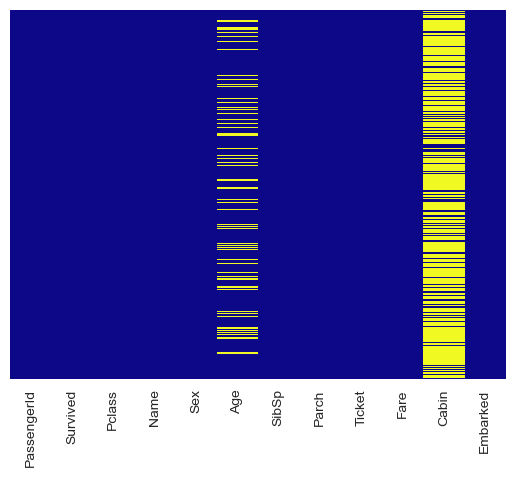

In [280]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='plasma')

In [281]:
# Let's take some more information

print(df.Age.describe())

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


<Axes: xlabel='Survived', ylabel='count'>

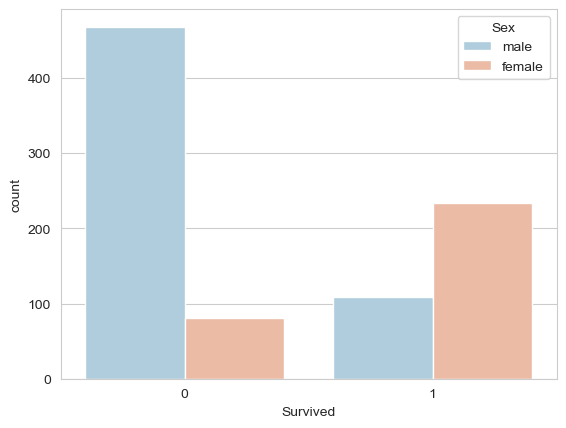

In [282]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')

#From this we can infer that females survived more than the males

In [283]:
# sns.set_style('whitegrid')
# sns.countplot(x='Survived', hue='Pclass',data=df,palette='rainbow')

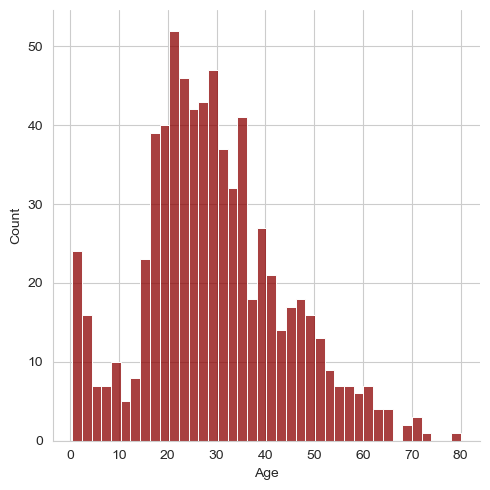

In [284]:
sns.displot(df['Age'].dropna(),kde=False,color='darkred',bins=40)

<Axes: xlabel='SibSp', ylabel='count'>

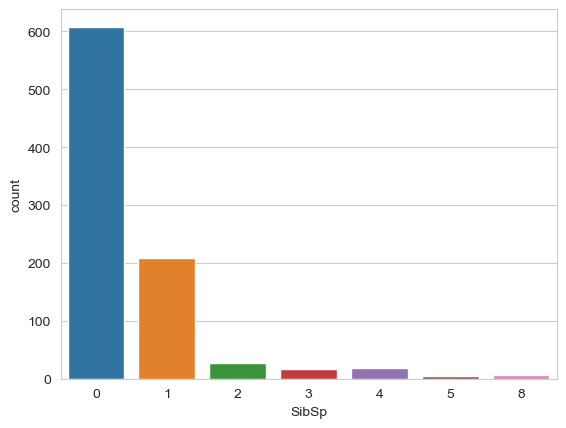

In [285]:
sns.countplot(x='SibSp',data=df)

<Axes: >

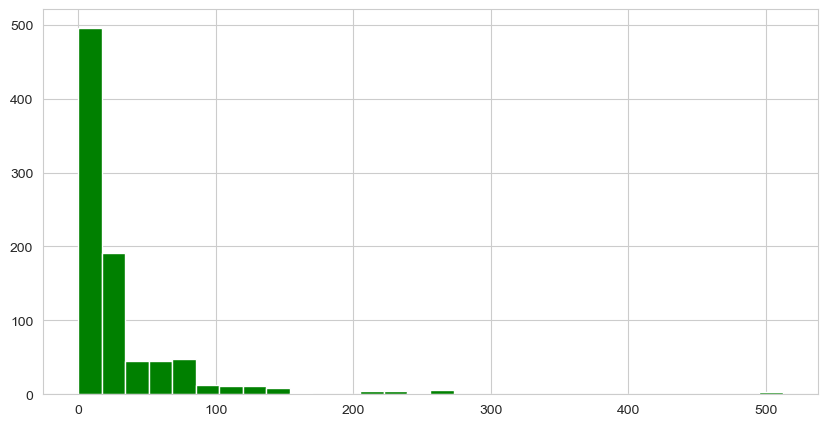

In [286]:
df['Fare'].hist(color='green',bins=30,figsize=(10,5))

<Axes: xlabel='Pclass', ylabel='Age'>

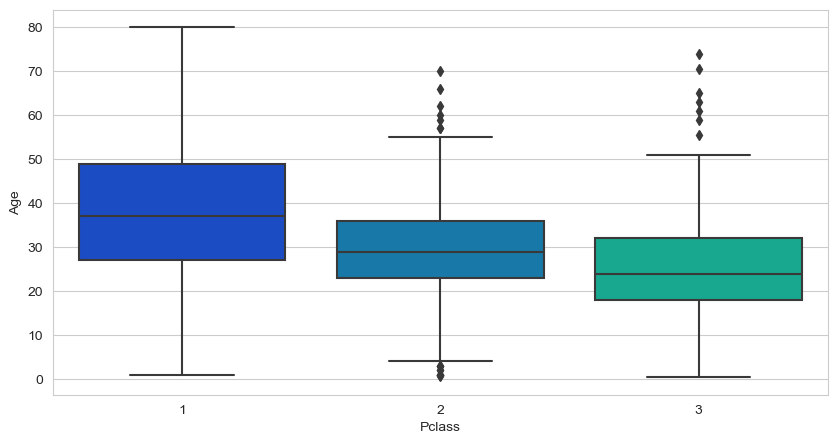

In [287]:
# We are taking the Pclass parameter bcz mostly Pclass = 1 passengers survived and so we know thier ages. Mostly they were aged 
# people. So, in the particular passenger class we can replace the 'age' null_values with the median of the age in that particular 
# class. 

plt.figure(figsize=(10, 5))
sns.boxplot(x='Pclass', y='Age',data=df,palette='winter')

In [288]:
def define_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37         # Median of Pclass=1 from above boxplot 

        elif Pclass == 2:
            return 29          # Median of Pclass=2 from above boxplot 

        else:
            return 24         # Median of Pclass=3 from above boxplot 

    else:
        return Age

In [289]:
df['Age'] = df[['Age','Pclass']].apply(define_age,axis=1)

df.dropna(subset = ['Embarked'], how='any', inplace=True)

df.drop(columns=['Cabin', 'Name', 'PassengerId', 'Ticket'], axis=0, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [290]:
# Encode categorical variables
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])
df['Embarked'] = encoder.fit_transform(df['Embarked'])

# Split the df dataset into training and testing sets but we will be mostly using the cross validation method
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<Axes: >

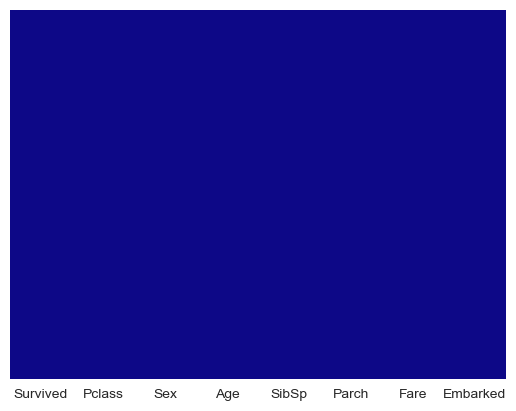

In [291]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='plasma')

# **Random Forest**

In [270]:
#Create a random forest classifier with additional hyperparameters
rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=100,   # Number of trees in the forest
                             min_samples_split=2,  
                             min_samples_leaf=1,
                             max_features='auto',
                             random_state=1)

In [271]:
# Train the model
rf_clf.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy: .3f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy:  0.783
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       167
           1       0.73      0.67      0.70       100

    accuracy                           0.78       267
   macro avg       0.77      0.76      0.76       267
weighted avg       0.78      0.78      0.78       267

Confusion Matrix:
[[142  25]
 [ 33  67]]


In [217]:
# Accuracy on Random Forest = 0.783

# **Logistic Regression**

In [218]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [219]:
print(f"Avg. Cross Value Score : {cross_val_score(LogisticRegression(solver='liblinear', multi_class='ovr'), X, y, cv=10).mean(): .3f}")

Avg. Cross Value Score :  0.798


In [220]:
#Avg. Cross Value on Logistic Regression = 0.798

# **Decision Tree**

In [221]:
print(f"Avg. Cross Value Score : {cross_val_score(DecisionTreeClassifier(criterion='gini'), X, y, cv=10).mean() : .3f}")

Avg. Cross Value Score :  0.781


In [222]:
#Avg. Cross Value on Decision Tree Classifier = 0.784

# **SVM**

In [223]:
print(f"Avg. Cross Value Score : {cross_val_score(SVC(gamma='auto'), X, y, cv=10).mean() : .3f}")

Avg. Cross Value Score :  0.700


In [224]:
# Avg. Cross Value Score on SVM = 0.7 

# **KNearestNeighbor**

In [225]:
#Here we are also need to do doing parameter tuning 

In [226]:
print(f"Avg. Cross Val Score: {cross_val_score(KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 1), X, y, cv=20).mean() : .3f}")

Avg. Cross Val Score:  0.727


In [227]:
print(f"Avg. Cross Val Score: {cross_val_score(KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 1), X, y, cv=20).mean() : .3f}")

Avg. Cross Val Score:  0.743


In [228]:
print(f"Avg. Cross Val Score: {cross_val_score(KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 1), X, y, cv=20).mean() : .3f}")

Avg. Cross Val Score:  0.724


In [229]:
# Avg. Cross Value Score on KNN Classifier = 0.743

# **Gaussian Naive Bayes Classifier**

In [230]:
print(f"Avg. Cross Value Score: {cross_val_score(GaussianNB(), X, y, cv=5).mean() : .3f}")

Avg. Cross Value Score:  0.789


In [231]:
#Avg. Cross Value Score of Gaussian Naive Bayes Classifier = 0.789

# **Multinomial Naive Bayes Classifier**

In [232]:
print(f"Avg. Cross Value Score: {cross_val_score(MultinomialNB(), X, y, cv=10).mean() : .3f}")

Avg. Cross Value Score:  0.686


In [233]:
#Avg. Cross Value Score of Multinomial Naive Bayes Classifier = 0.686

# **AdaBoost Classifier** 

In [234]:
print(f"Avg. Cross Value Score: {cross_val_score(AdaBoostClassifier(n_estimators=30, learning_rate=1, random_state=0), X, y, cv=10).mean() : .3f}")

Avg. Cross Value Score:  0.813


In [235]:
print(f"Avg. Cross Value Score: {cross_val_score(AdaBoostClassifier(n_estimators=35, learning_rate=1, random_state=0), X, y, cv=10).mean() : .3f}")

Avg. Cross Value Score:  0.817


In [236]:
print(f"Avg. Cross Value Score: {cross_val_score(AdaBoostClassifier(n_estimators=45, learning_rate=1, random_state=0), X, y, cv=10).mean() : .3f}")

Avg. Cross Value Score:  0.814


In [237]:
#Avg. Cross Value Score of Adaboost Classifier = 0.817

# **Gradient Boosting Classifier**

In [238]:
print(f"Avg. Cross Value Score: {cross_val_score(GradientBoostingClassifier(n_estimators=25, learning_rate=1, random_state=0), X, y, cv=10).mean() : .3f}")

Avg. Cross Value Score:  0.810


In [239]:
print(f"Avg. Cross Value Score: {cross_val_score(GradientBoostingClassifier(n_estimators=27, learning_rate=1, random_state=0), X, y, cv=10).mean() : .3f}")

Avg. Cross Value Score:  0.813


In [240]:
print(f"Avg. Cross Value Score: {cross_val_score(GradientBoostingClassifier(n_estimators=30, learning_rate=1, random_state=0), X, y, cv=10).mean() : .3f}")

Avg. Cross Value Score:  0.810


In [241]:
#Avg. Cross Value Score of Gradient Boosting Classifier = 0.813

# **Model**

In [242]:
# Since we have so many classifiers and we checked almost all the classifiers we had learnt yet, the most accurate among them is the
# AdaBoost Classifier

In [254]:
# Creating adaboost classifer object
obj = AdaBoostClassifier(n_estimators=35, learning_rate=1, random_state=0)

## Train Adaboost Classifer
model1 = obj.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model1.predict(X_test)

print(f"AdaBoost Classifier Model Accuracy:  {accuracy_score(y_test, y_pred): .3f}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

AdaBoost Classifier Model Accuracy:   0.809
Confusion Matrix:
[[139  28]
 [ 23  77]]


In [ ]:
# So, our Model is ready with an accuracy of almost 81% i.e. with an accuracy of 81% it can predict if the person has survived or not.

# This week I was able to learn and explore various tough but important classifiers as compared to the previous ones. And so, I have tried exploring
# all the classifiers except some which I need to explore more.